In [1]:
import pandas as pd

plot_folder = "Bean"
data = pd.read_csv("Bean/Bean.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [2]:
X.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
y.describe()

count        13611
unique           7
top       DERMASON
freq          3546
Name: Class, dtype: object

In [4]:
y = y.to_numpy().ravel()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

num_features = X.shape[1]
num_outputs = len(set(y))
num_avg = (num_features + num_outputs) // 2

hidden_layers = [
    (),
    (num_avg,),
    (num_avg, num_avg),
    (num_avg, num_outputs),
    (num_features, num_avg, num_outputs),
]

models = []
y_train_preds, y_test_preds = [], []
acc_train, acc_test = [], []
prec_train, prec_test = [], []
rec_train, rec_test = [], []
f1_train, f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(X_train, y_train)
    models.append(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.913299       0.917738         0.913942   
1         (11,)        0.922300       0.924715         0.922454   
2      (11, 11)        0.919912       0.922879         0.921128   
3       (11, 7)        0.918442       0.924348         0.918517   
4   (16, 11, 7)        0.921749       0.924715         0.922226   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.918083      0.913299     0.917738        0.913438       0.917816  
1        0.924756      0.922300     0.924715        0.922357       0.924701  
2        0.923269      0.919912     0.922879        0.920294       0.923003  
3        0.924082      0.918442     0.924348        0.918450       0.924162  
4        0.925012      0.921749     0.924715        0.921870       0.924779  


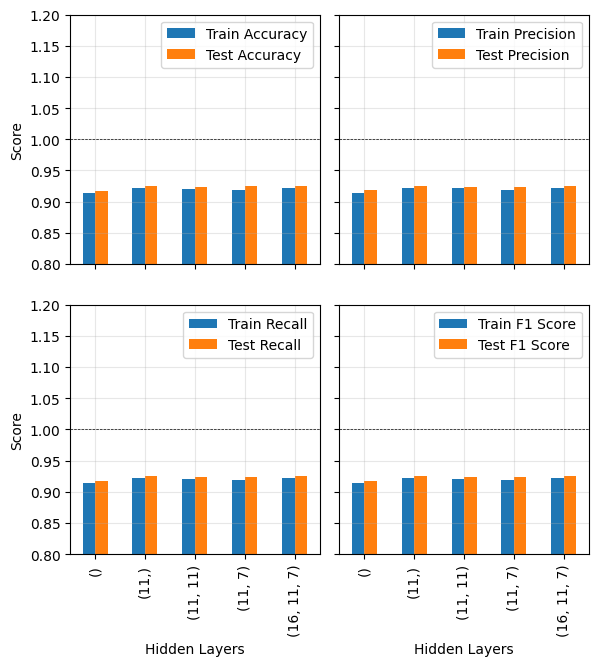

In [7]:
import pandas as pd

results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            acc_train,
            acc_test,
            prec_train,
            prec_test,
            rec_train,
            rec_test,
            f1_train,
            f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.8, 1.2), ylabel="Score"
    )
    ax.grid(alpha=0.3)
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/scores.png", dpi=300)

In [8]:
import shap

shap.initjs()

/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
X100 = shap.utils.sample(X_train, 100)

In [10]:
explainer = shap.KernelExplainer(model.predict_proba, X100, feature_names=X.columns)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/2723 [00:00<?, ?it/s]

100%|██████████| 2723/2723 [09:50<00:00,  4.61it/s]


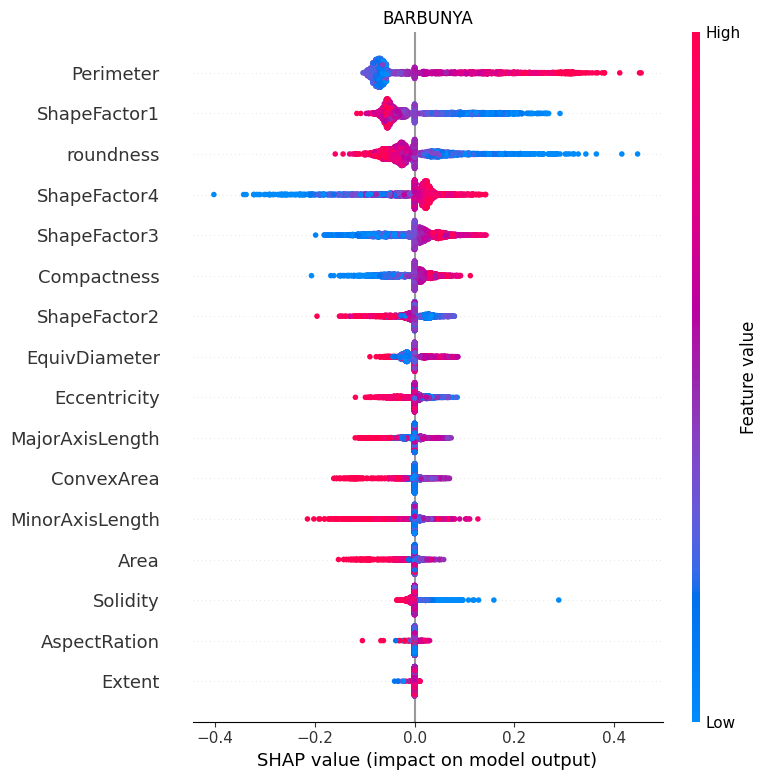

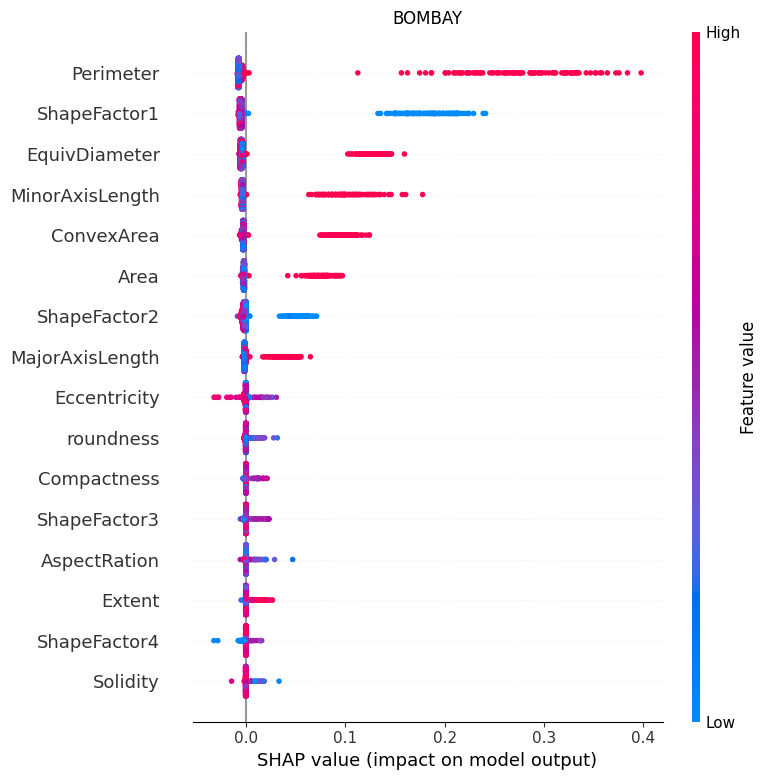

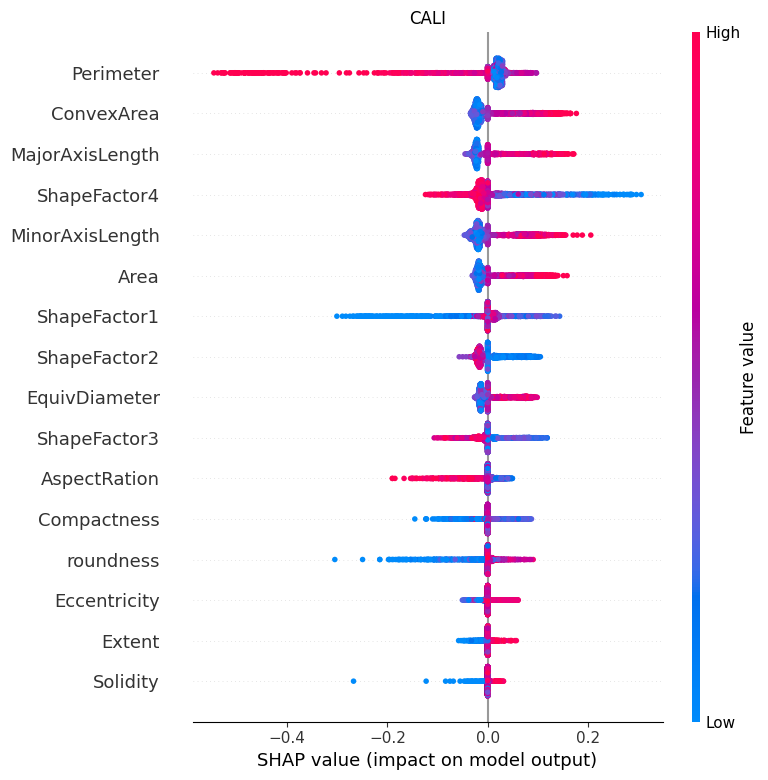

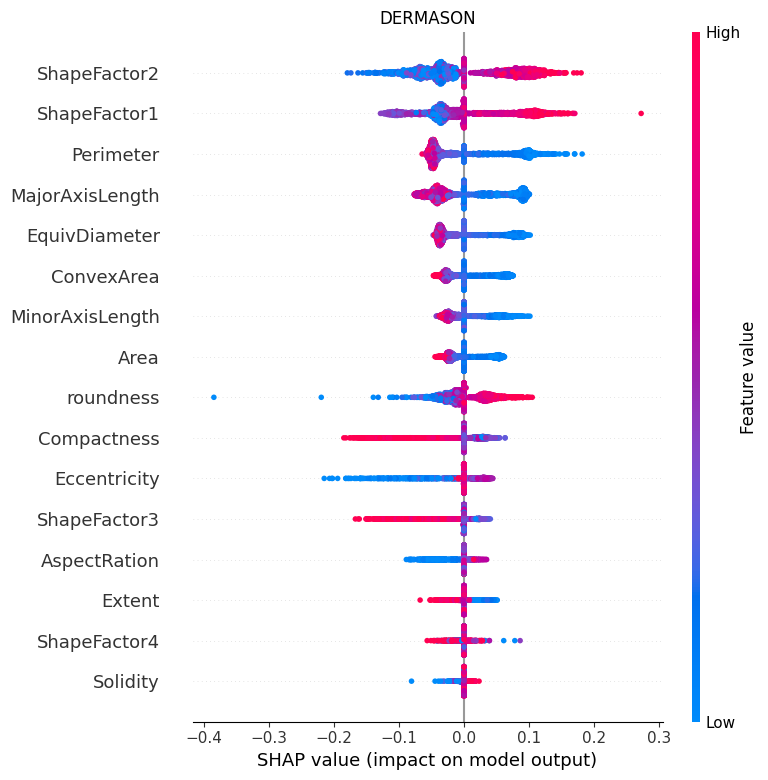

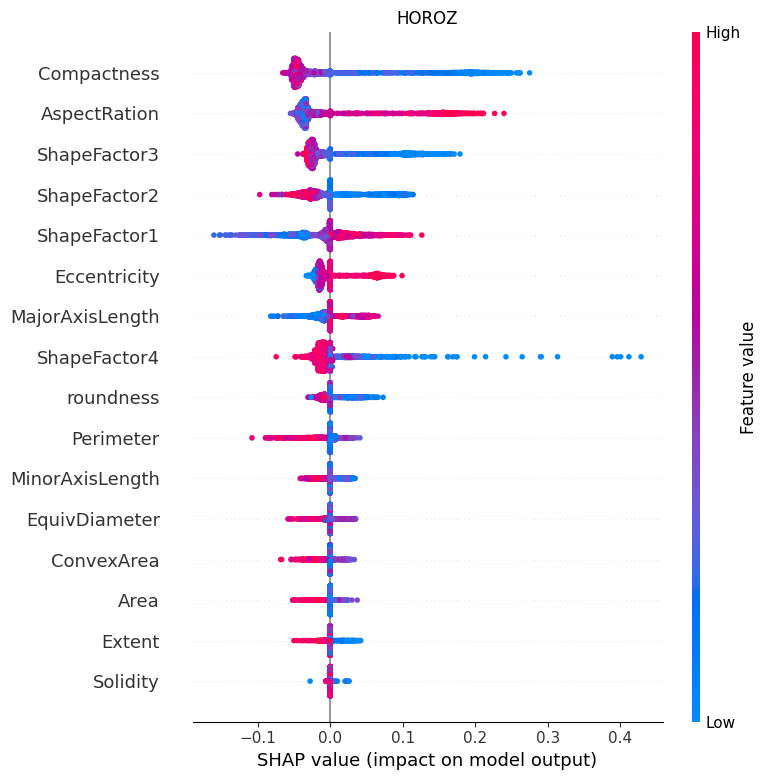

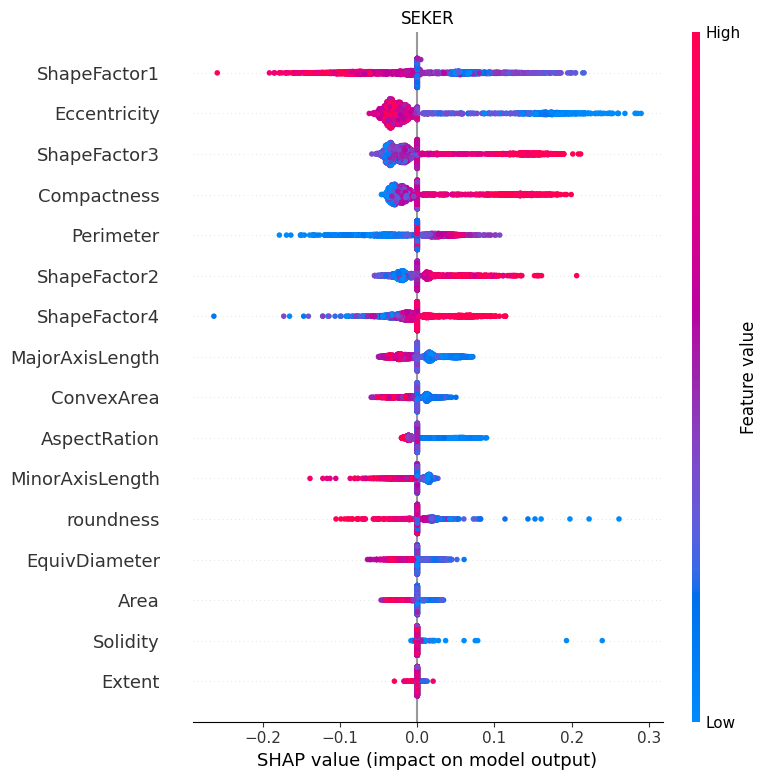

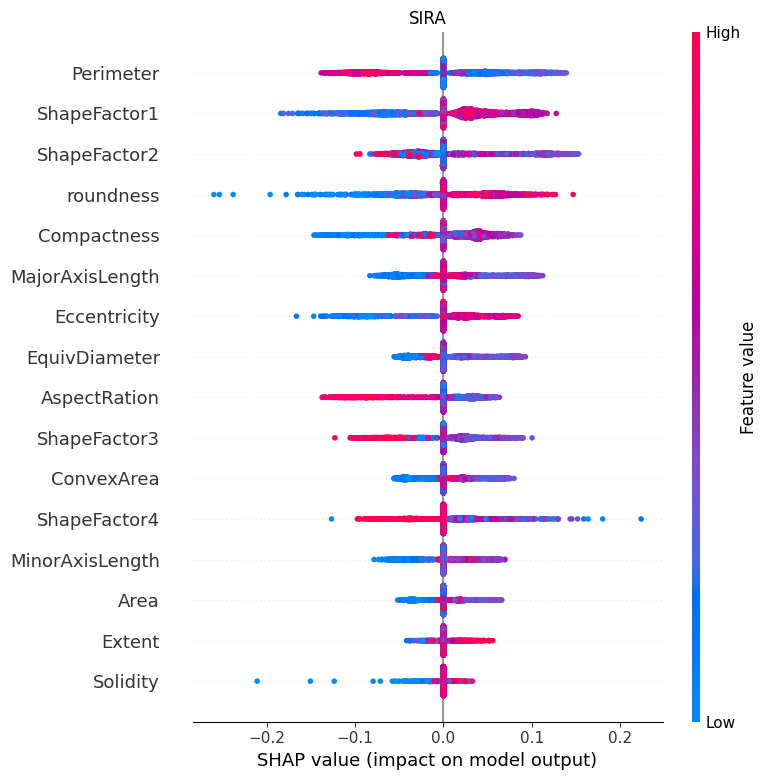

In [11]:
for i, class_name in enumerate(model.classes_):
    per_class_explanation = shap.Explanation(
        shap_values[:, :, i], data=X_test, feature_names=X.columns
    )
    shap.plots.beeswarm(per_class_explanation, show=False, max_display=16)
    plt.gca().set_title(f"{class_name}")
    plt.tight_layout()
    plt.savefig(f"{plot_folder}/per_class_beeswarm_class_{class_name}.png", dpi=300)
    plt.show()

In [12]:
import numpy as np

per_class_mean_abs_shap = {}

for i, class_name in enumerate(model.classes_):
    per_class_mean_abs_shap[class_name] = np.mean(np.abs(shap_values[:, :, i]), axis=0)

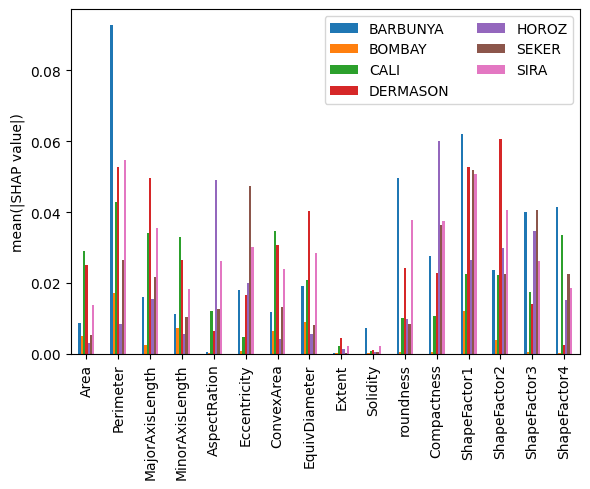

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))

df = pd.DataFrame(per_class_mean_abs_shap)
df.plot.bar(ax=ax)

ax.set_xticklabels(X.columns)
ax.legend(ncols=2)
ax.set_ylabel(r"mean(|SHAP value|)")

plt.tight_layout()
fig.savefig(f"{plot_folder}/per_class_mean_abs_shap.png", dpi=300)
plt.show()

In [14]:
preds = model.predict(X_test)

actual_prediction_shap_values = []

for i, pred in enumerate(preds):
    actual_prediction_shap_values.append(
        shap_values[i][:, model.classes_.tolist().index(pred)]
    )

actual_prediction_shap_values = np.array(actual_prediction_shap_values)

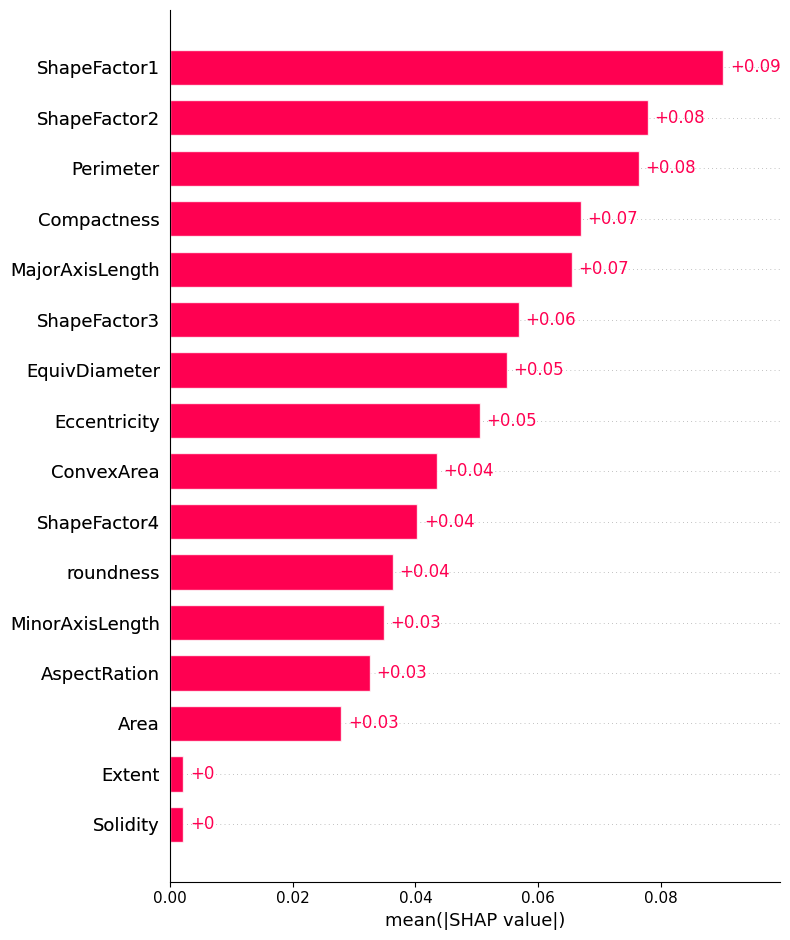

In [15]:
explanation = shap.Explanation(actual_prediction_shap_values, feature_names=X.columns)
shap.plots.bar(explanation, show=False, max_display=16)
plt.tight_layout()
plt.savefig(f"{plot_folder}/actual_prediction_mean_abs_shap_values.png", dpi=300)
plt.show()

In [16]:
cols_to_remove = ["Extent", "Solidity"]
cols_idx_to_remove = np.flatnonzero(np.isin(X.columns, cols_to_remove))
print(cols_idx_to_remove)

mask = np.ones(num_features, dtype=bool)
mask[cols_idx_to_remove]=False

[8 9]


In [17]:
new_X_train = X_train[:, mask]
new_X_test = X_test[:, mask]

In [18]:
new_models = []
new_y_train_preds, new_y_test_preds = [], []
new_acc_train, new_acc_test = [], []
new_prec_train, new_prec_test = [], []
new_rec_train, new_rec_test = [], []
new_f1_train, new_f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(new_X_train, y_train)
    models.append(model)

    y_train_pred = model.predict(new_X_train)
    y_test_pred = model.predict(new_X_test)
    
    new_y_train_preds.append(y_train_pred)
    new_y_test_preds.append(y_test_pred)

    new_acc_train.append(accuracy_score(y_train, y_train_pred))
    new_acc_test.append(accuracy_score(y_test, y_test_pred))
    new_prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    new_prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    new_rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    new_rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    new_f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    new_f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.912197       0.916636         0.912834   
1         (11,)        0.915871       0.924715         0.916430   
2      (11, 11)        0.919269       0.924715         0.919301   
3       (11, 7)        0.919728       0.922145         0.919814   
4   (16, 11, 7)        0.919636       0.923246         0.919671   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.917222      0.912197     0.916636        0.912333       0.916754  
1        0.924846      0.915871     0.924715        0.915988       0.924697  
2        0.924565      0.919269     0.924715        0.919225       0.924542  
3        0.922060      0.919728     0.922145        0.919724       0.922032  
4        0.923086      0.919636     0.923246        0.919543       0.923011  


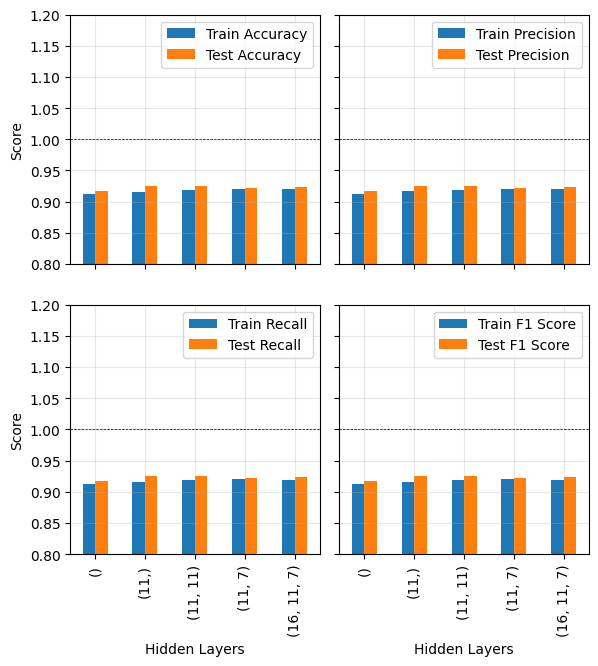

In [19]:
results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            new_acc_train,
            new_acc_test,
            new_prec_train,
            new_prec_test,
            new_rec_train,
            new_rec_test,
            new_f1_train,
            new_f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.8, 1.2), ylabel="Score"
    )
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.grid(alpha=0.3)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/new_scores.png", dpi=300)

In [20]:
for i, hidden_layer in enumerate(hidden_layers):
    matches_train = sum(
        old == new for old, new in zip(new_y_train_preds[i], y_train_preds[i])
    )
    size_train = len(y_train_preds[i])
    matches_test = sum(
        old == new for old, new in zip(new_y_test_preds[i], y_test_preds[i])
    )
    size_test = len(y_test_preds[i])
    print(f"Hidden Layer {hidden_layer}:")
    print(f"\tTrain Matches: {matches_train}/{size_train} ({matches_train/size_train*100:.2f}%)")
    print(f"\tTest Matches: {matches_test}/{size_test} ({matches_test/size_test*100:.2f}%)")

Hidden Layer ():
	Train Matches: 10772/10888 (98.93%)
	Test Matches: 2705/2723 (99.34%)
Hidden Layer (11,):
	Train Matches: 10651/10888 (97.82%)
	Test Matches: 2675/2723 (98.24%)
Hidden Layer (11, 11):
	Train Matches: 10627/10888 (97.60%)
	Test Matches: 2664/2723 (97.83%)
Hidden Layer (11, 7):
	Train Matches: 10606/10888 (97.41%)
	Test Matches: 2658/2723 (97.61%)
Hidden Layer (16, 11, 7):
	Train Matches: 10632/10888 (97.65%)
	Test Matches: 2668/2723 (97.98%)
